# 0. Import dependencies

In [1]:
import sys 
sys.path.insert(-1,"../")
sys.path.insert(-1,"../tomplotlib/")
from mazeAgentUtils import *
from tomplotlib import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# 1.0 Open loop maze

## 1.1 Make agent 

In [2]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

#Default parameters for MazeAgent 
params = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.001,       #simulation time disretisation 
          'dx'                  : 0.01,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze

          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.5,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }

In [3]:
agent =  MazeAgent(params)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


## 1.1.1 ...or load agent?

In [17]:
agent = MazeAgent(loadFromFileCalled="openLoop")

mazeType
stateType
movementPolicy
roomSize
dt
dx
speedScale
rotSpeedScale
initPos
initDir
nCells
centres
sigma
doorsClosed
reorderCells
firingRateLookUp
biasDoorCross
biasWallFollow
tau
TDdx
alpha
successorFeatureNorm
TDreg
peakFiringRate
tau_STDP_plus
tau_STDP_minus
a_STDP
eta
baselineFiringRate
thetaFreq
precessFraction
kappa
mazeState
history
snapshots
pos
speed
dir
t
runID
thetaPhase
walls
extent
width
height
xArray
yArray
discreteCoords
doorPassage
doorPassageTime
lastTurnUpdate
randomTurnSpeed
stateSize
M
W
M_theta
W_notheta
sigmas
statesAlreadyInitialised
discreteStates
preTrace
preTrace_notheta
postTrace
postTrace_notheta
lastSpikeTime
lastSpikeTime_notheta
spikeCount
spikeCount_notheta
gridFields
placeFields


## 1.2 Run rat 

  0%|          | 0/1800000 [00:00<?, ?it/s]

Calculating place and grid cells


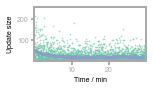

In [4]:
agent.runRat(trainTime=30,saveEvery=0.5)

## 1.2.1 ...and save agent?

In [5]:
agent.saveToFile(name="openLoop")

## 1.3 Plot all required figures

peak shift (W, M)          = (-0.38 +- 0.03    ,    -0.27 +- 0.00)
receptive field skew       =  -0.00 +- 0.02
place field skew (W, M)    = (-0.24 +- 0.07    ,    -0.39 +- 0.01)
R squared (M, W)           = 0.867


'../figures/211108/openLoopEnd_sidepf_1249'

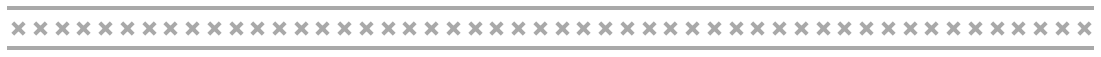

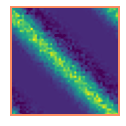

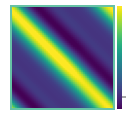

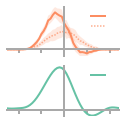

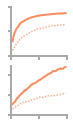

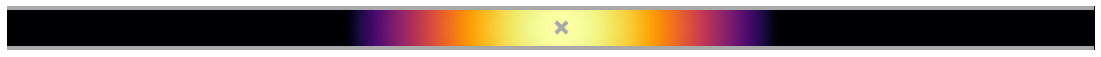

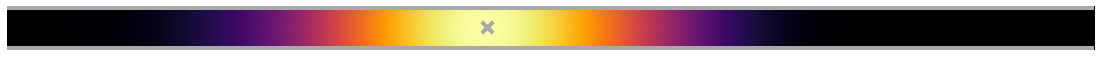

In [18]:
#FIGURE 2A
plotter = Visualiser(agent)
fig, ax = plotter.plotFeatureCells(centresOnly=True, textlabel=False,onepink=True)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2A.svg")


#FIGURE 2B
fig, ax = plotter.plotM(whichM='W',colorbar=False,time=30)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2B.svg')

#FIGURE 2C
fig, ax, cb, cax = plotter.plotM(whichM='M')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2C.svg')

# #FIGURE 2Ci
# fig, ax = plotter.plotM(whichM='W_notheta',colorbar=False,time=30)
# ax.axis('on')
# for spine in ax.spines.values():
#     spine.set_color('C1')
#     spine.set_linewidth(2)
#     spine.set_linestyle((0,(0.5,2)))
# ax.set_xticks([])
# ax.set_yticks([])
# saveFigure(fig,'W_notheta')

#FIGURE 2D
fig, ax = plotter.plotMAveraged(time=30)
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2D.svg')

#FIGURE 2E
fig, ax = plotter.plotMetrics()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2E.svg')


#FIGURE 3A
N = 25

fig, ax = plotter.plotReceptiveField(number=N)
saveFigure(fig,'openLoopStart',specialLocation="../figures/paperFigures/figure3/3Ai.svg")

fig, ax = plotter.plotPlaceField(time=10, number=N, STDP=True,threshold=0)
saveFigure(fig,'openLoopEnd',specialLocation="../figures/paperFigures/figure3/3Aii.svg")

placeFields = agent.getPlaceFields(M=agent.W,threshold=0)
placeFields_M = agent.getPlaceFields(M=agent.M,threshold=0)
x = agent.discreteCoords[10,:,0]
skew_PF, skew_PFM, skew_RF, shift, shiftM, R2list = [], [], [], [], [], []

for n in range(0,50):
    peak_pf, skew_pf = getPeak(x,placeFields[n][10,:]), getSkewness(placeFields[n][10,:],circular=True)
    peak_pfM, skew_pfM = getPeak(x,placeFields_M[n][10,:]), getSkewness(placeFields_M[n][10,:],circular=True)
    peak_rf, skew_rf = getPeak(x,agent.discreteStates[10,:,n]), getSkewness(agent.discreteStates[10,:,n],circular=True)
    peak_rfM = peak_rf
    if peak_pf > peak_rf: peak_rf += agent.roomSize  
    if peak_pfM > peak_rfM: peak_rfM += agent.roomSize 
    peak_shift = peak_pf - peak_rf
    peak_shiftM = peak_pfM - peak_rfM
    shift.append(peak_shift)
    shiftM.append(peak_shiftM)
    skew_PF.append(skew_pf)
    skew_PFM.append(skew_pfM)
    skew_RF.append(skew_rf)
    R2list.append(Rsquared(placeFields[n][10,:],placeFields_M[n][10,:]))
print('peak shift (W, M)          = (%.2f +- %.2f    ,    %.2f +- %.2f)' %(np.mean(shift),np.std(shift),np.mean(shiftM),np.std(shiftM)))
print('receptive field skew       =  %.2f +- %.2f' %(np.mean(skew_RF),np.std(skew_RF)))
print('place field skew (W, M)    = (%.2f +- %.2f    ,    %.2f +- %.2f)' %(np.mean(skew_PF),np.std(skew_PF),np.mean(skew_PFM),np.std(skew_PFM)))

print('R squared (M, W)           = %.3f' %(Rsquared(agent.M,agent.W)))

fig, ax = plotter.plotFieldSilhouette(N=N, plot_pf=False,plot_pf_M=False,plot_rf=True)
saveFigure(fig,'openLoopEnd_siderf',specialLocation="../figures/paperFigures/figure3/3Aiii.svg")

fig, ax = plotter.plotFieldSilhouette(N=N, plot_pf=True,plot_pf_M=True,plot_rf=False)
saveFigure(fig,'openLoopEnd_sidepf',specialLocation="../figures/paperFigures/figure3/3Aiv.svg")

# 2.0 Closed corridor maze

## 2.1 Make maze agent 

In [7]:
#Default parameters for MazeAgent 
params2 = params.copy()
params2['doorsClosed'] = True

agent2 =  MazeAgent(params2)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


In [8]:
agent2 =  MazeAgent(params2)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


## 2.1.1 ...or load agent?

In [ ]:
agent2 =  MazeAgent(loadFromFileCalled='closedLoop')

## 2.2 Run rat 


  0%|          | 0/1800000 [00:00<?, ?it/s]

Calculating place and grid cells


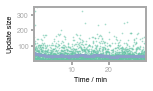

In [9]:
agent2.runRat(trainTime=30,saveEvery=0.5)

## 2.2.1 ...and save agent?

In [10]:
agent.saveToFile(name = "closedLoop")

## 2.3 Plot all required figures

peak shift (W, M)          = (-0.01 +- 0.17    ,    0.02 +- 0.12)
receptive field skew       =  -0.00 +- 0.42
place field skew (W, M)    = (0.01 +- 0.58    ,    0.02 +- 0.46)


'/Users/tomgeorge/Documents/figureMaking/figures/211104/svg/closedLoopEnd_sidepf_0021'

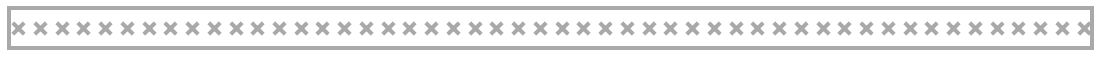

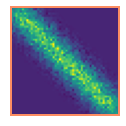

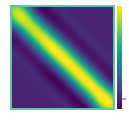

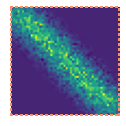

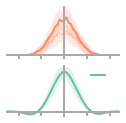

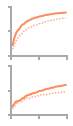

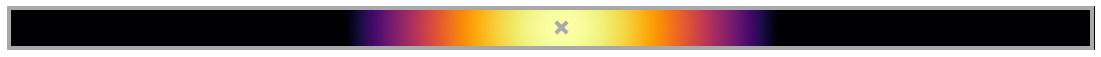

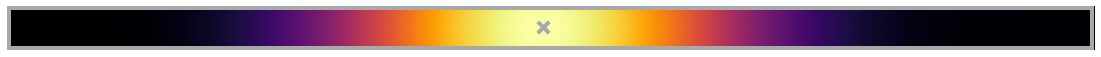

In [11]:
#FIGURE 2F
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotFeatureCells(centresOnly=True, textlabel=False,onepink=False)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2F.svg")

#FIGURE 2G
fig, ax = plotter2.plotM(whichM='W',colorbar=False,time=30)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2G.svg')

#FIGURE 2H
fig, ax, cb, cax = plotter2.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2H.svg')

fig, ax = plotter2.plotM(whichM='W_notheta',colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
    spine.set_linestyle((0,(0.5,2)))
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_notheta')


#FIGURE 2IJ
fig, ax = plotter2.plotMAveraged()
ax[0].get_legend().set_visible(False) 
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2I.svg')

fig, ax = plotter2.plotMetrics()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2J.svg')

#FIGURE 3B
N = 25

fig, ax = plotter2.plotReceptiveField(number=N)
saveFigure(fig,'closedLoopStart',specialLocation="../figures/paperFigures/figure3/3Bi.svg")

fig, ax = plotter2.plotPlaceField(time=10, number=N, STDP=True,threshold=0)
saveFigure(fig,'closedLoopEnd',specialLocation="../figures/paperFigures/figure3/3Bii.svg")

placeFields = agent2.getPlaceFields(M=agent2.W,threshold=0)
placeFields_M = agent2.getPlaceFields(M=agent2.M,threshold=0)
x = agent2.discreteCoords[10,:,0]
skew_PF, skew_PFM, skew_RF, shift, shiftM, R2list = [], [], [], [], [], []

for n in range(0,50):
    peak_pf, skew_pf = getPeak(x,placeFields[n][10,:]), getSkewness(placeFields[n][10,:],circular=True)
    peak_pfM, skew_pfM = getPeak(x,placeFields_M[n][10,:]), getSkewness(placeFields_M[n][10,:],circular=True)
    peak_rf, skew_rf = getPeak(x,agent2.discreteStates[10,:,n]), getSkewness(agent2.discreteStates[10,:,n],circular=True)
    peak_rfM = peak_rf
    # if peak_pf > peak_rf: peak_rf += agent2.roomSize  
    # if peak_pfM > peak_rfM: peak_rfM += agent2.roomSize 
    peak_shift = peak_pf - peak_rf
    peak_shiftM = peak_pfM - peak_rfM
    shift.append(peak_shift)
    shiftM.append(peak_shiftM)
    skew_PF.append(skew_pf)
    skew_PFM.append(skew_pfM)
    skew_RF.append(skew_rf)
    R2list.append(Rsquared(placeFields[n][10,:],placeFields_M[n][10,:]))
print('peak shift (W, M)          = (%.2f +- %.2f    ,    %.2f +- %.2f)' %(np.mean(shift),np.std(shift),np.mean(shiftM),np.std(shiftM)))
print('receptive field skew       =  %.2f +- %.2f' %(np.mean(skew_RF),np.std(skew_RF)))
print('place field skew (W, M)    = (%.2f +- %.2f    ,    %.2f +- %.2f)' %(np.mean(skew_PF),np.std(skew_PF),np.mean(skew_PFM),np.std(skew_PFM)))


fig, ax = plotter2.plotFieldSilhouette(N=N, plot_pf=False,plot_pf_M=False,plot_rf=True)
saveFigure(fig,'closedLoopEnd_siderf',specialLocation="../figures/paperFigures/figure3/3Biii.svg")

fig, ax = plotter2.plotFieldSilhouette(N=N, plot_pf=True,plot_pf_M=True,plot_rf=False)
saveFigure(fig,'closedLoopEnd_sidepf',specialLocation="../figures/paperFigures/figure3/3Biv.svg")


# 3.0 Two room maze

## 3.1 Make maze agent 
### we make one with policy biasing and another without 

In [3]:
#Default parameters for MazeAgent 
N = 2000 
roomSize = 2.5
n = int(np.sqrt(N / 2))
delta = roomSize / n
x = np.arange(0,2.5,delta) + delta/2
y = np.arange(0,2.5,delta) + delta/2
xy = np.meshgrid(x,y)
centresL = []
for i in range(len(x)):
    for j in range(len(y)):
        centresL += [[x[i],y[j]]]
centresL = np.array(centresL)
centresR = centresL + np.array([2.5,0])
centres = np.vstack([centresL,centresR])
delta=0.45*delta
centres += np.random.uniform(-0.8*delta,0.8*delta,size=centres.shape)

params3 = { 

          #Maze params 
          'mazeType'            : 'twoRooms',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : roomSize,          #maze size scaling parameter, metres
          'dt'                  : 0.001,       #simulation time disretisation 
          'dx'                  : 0.02,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'firingRateLookUp'    : True,
          'rotSpeedScale'       : 1.5,
          'biasDoorCross'       : True,
          'biasWallFollow'      : True,

          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.5,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }


params3_unbiased = params3.copy()
params3_unbiased['biasDoorCross'] = False
params3_unbiased['biasWallFollow'] = False

In [4]:
# params3['dt'] = 0.02
# params3['dx'] = 0.1
agent3 =  MazeAgent(params3)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/31250 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


In [5]:
# params3_unbiased['dt'] = 0.02
# params3_unbiased['dx'] = 0.1
agent3_unbiased = MazeAgent(params3_unbiased)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/31250 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


## 3.1.1 ...or load agents?

In [7]:
agent3 = MazeAgent(loadFromFileCalled="twoRooms_huge")

Loading attributes:
Done. use 'agent3.__dict__.keys()'  to see avaiable attributes


In [5]:
agent3_unbiased = MazeAgent(loadFromFileCalled="twoRooms_unbiased_huge")

mazeType
stateType
movementPolicy
roomSize
dt
dx
speedScale
rotSpeedScale
initPos
initDir
nCells
centres
sigma
doorsClosed
reorderCells
firingRateLookUp
biasDoorCross
biasWallFollow
tau
TDdx
alpha
successorFeatureNorm
TDreg
peakFiringRate
tau_STDP_plus
tau_STDP_minus
a_STDP
eta
baselineFiringRate
thetaFreq
precessFraction
kappa
mazeState
history
snapshots
pos
speed
dir
t
runID
thetaPhase
walls
extent
width
height
xArray
yArray
discreteCoords
doorPassage
doorPassageTime
lastTurnUpdate
randomTurnSpeed
stateSize
M
W
M_theta
W_notheta
sigmas
statesAlreadyInitialised
discreteStates
preTrace
preTrace_notheta
postTrace
postTrace_notheta
lastSpikeTime
lastSpikeTime_notheta
spikeCount
spikeCount_notheta


## 3.2 Run rats 

  0%|          | 0/7200000 [00:00<?, ?it/s]

Keyboard Interrupt:
Calculating place and grid cells


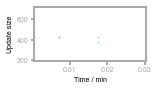

In [9]:
agent3.runRat(trainTime=120)

  0%|          | 0/7200000 [00:00<?, ?it/s]

Calculating place and grid cells


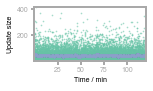

In [16]:
agent3_unbiased.runRat(trainTime=120)

## 3.2.1 ...and save agents? 

In [6]:
agent3.saveToFile(name="twoRooms_huge")

In [7]:
agent3_unbiased.saveToFile(name="twoRooms_unbiased_huge")

## 3.3 Plot figures

wall cells, eccentricity                =  0.57 +- 0.06  (N=15) 
centre cells, eccentricity              =  0.33 +- 0.07  (N=32) 
wall cells (unbiased), eccentricity     =  0.54 +- 0.06  (N=15) 
wall to centre           :            p =  0.00000000
wall (unbiased) to centre:            p =  0.00000000
wall to wall (unbiased)  :            p =  0.18441618
door cells shift inwards by             =  0.15 +- 0.06  (N=16) 
centre cells shift inwards by           =  0.04 +- 0.05  (N=32) 
door cells (unbiased) shift inwards by  =  0.05 +- 0.08  (N=16) 
door to centre           :            p = 0.00000020
door (unbiased) to centre:            p = 0.35158773
door to door (unbiased)  :            p = 0.00301521


(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

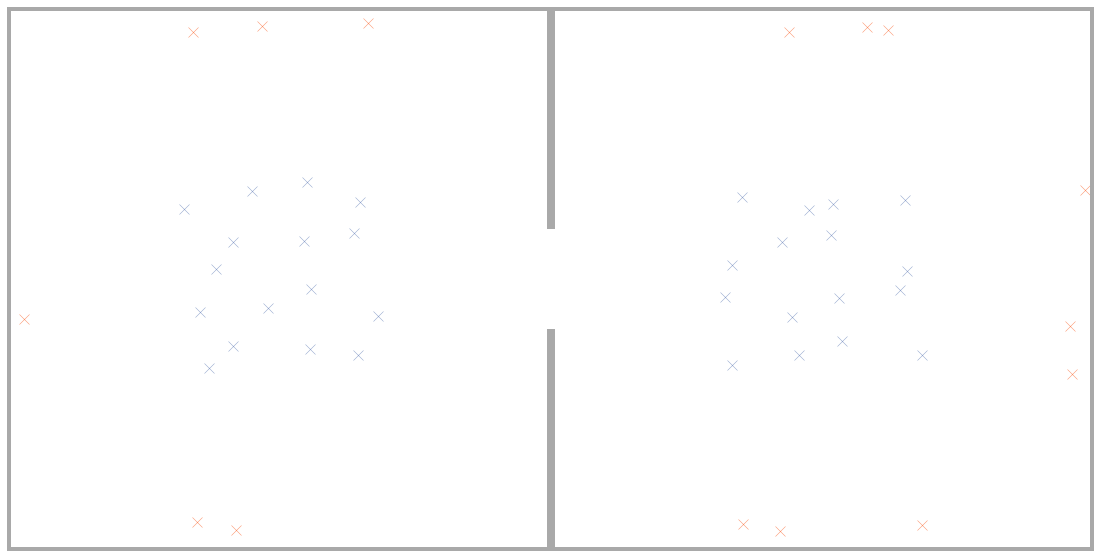

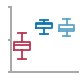

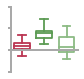

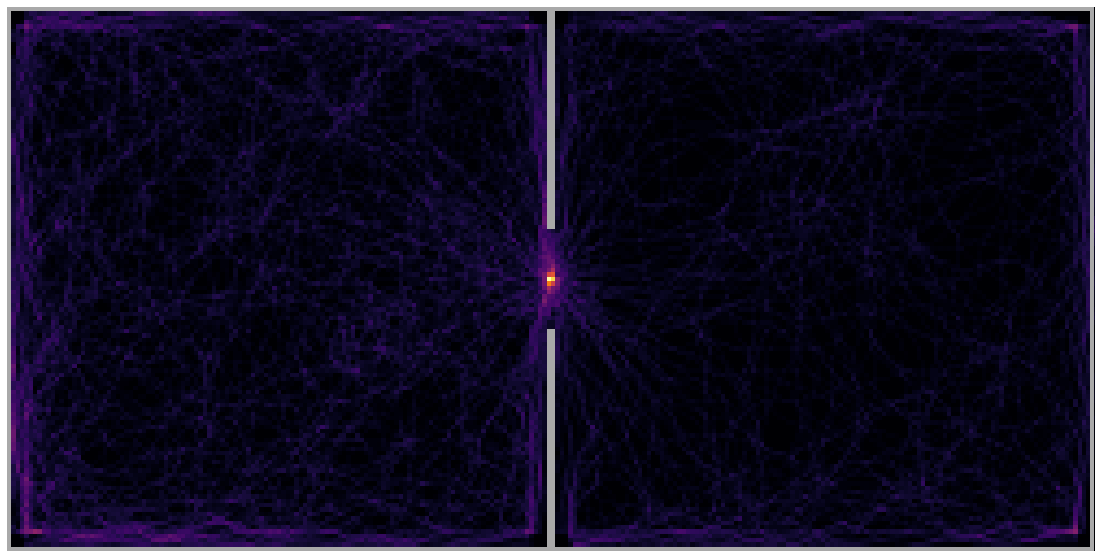

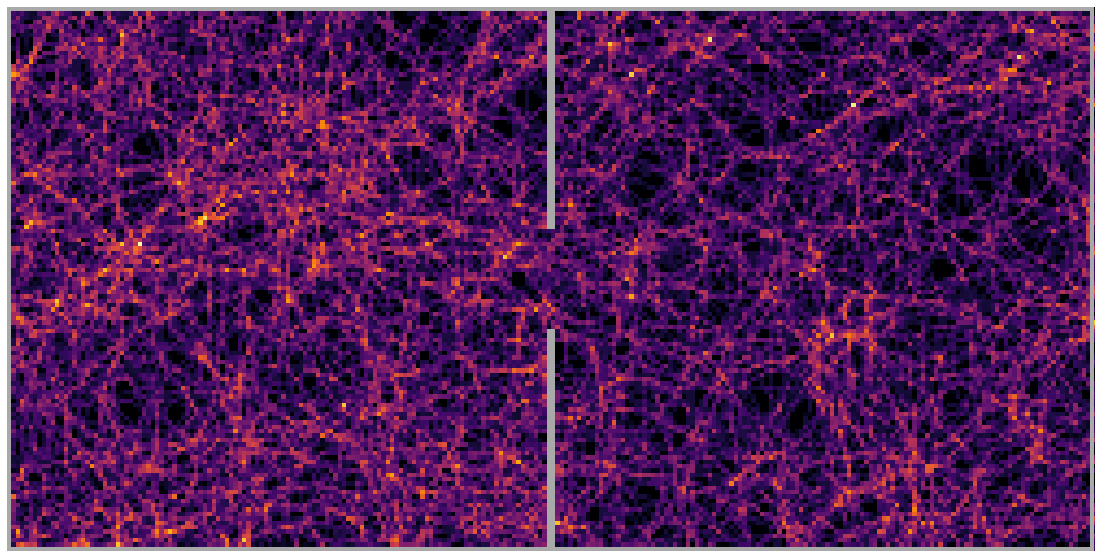

In [52]:
plotter3 = Visualiser(agent3)
plotter3_unbiased = Visualiser(agent3_unbiased)



# #FIGURE 2K
# fig, ax = plotter3.plotFeatureCells(centresOnly=True, textlabel=False)
# saveFigure(fig, 'twoRoom',specialLocation="../figures/paperFigures/figure2/2K.svg")



# #FIGURE 2L
# fig, ax = plotter3.plotM(whichM='W',colorbar=False,time=60)
# ax.axis('on')
# for spine in ax.spines.values():
#     spine.set_color('C1')
#     spine.set_linewidth(2)
# ax.set_xticks([])
# ax.set_yticks([])
# saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2L.svg')



# #FIGURE 2M
# fig, ax, cb, cax = plotter3.plotM()
# ax.axis('on')
# for spine in ax.spines.values():
#     spine.set_color('C0')
#     spine.set_linewidth(2)
# cb.set_ticks([0])
# cb.set_ticklabels([""])
# cax.tick_params(color='darkgrey',width=2)
# ax.set_xticks([])
# ax.set_yticks([])
# saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2M.svg')

# fig, ax = plotter3.plotMetrics()
# saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2N.svg')

# print(Rsquared(agent3.M,agent3.W))


#FIGURE 3C

cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([0,1.25]),axis=1))

# #figure 3Ctop
# fig, ax = plotter3.plotReceptiveField(number=cellID, fitEllipse_=True)
# saveFigure(fig,'2DMazeSideStart',specialLocation="../figures/paperFigures/figure3/3Ci.svg")

# #figure 3Cbottom
# fig, ax = plotter3.plotPlaceField(number=cellID, STDP=True,fitEllipse_=True,threshold=0.2)
# saveFigure(fig,'2DMazeSideEnd',specialLocation="../figures/paperFigures/figure3/3Cii.svg")

placeFields = agent3.getPlaceFields(M=agent3.W,threshold=0.5)
placeFields_unbiased = agent3_unbiased.getPlaceFields(M=agent3_unbiased.W,threshold=0.5)
coords = agent3.discreteCoords
eccen_wall = []
eccen_wall_unbiased = []
eccen_centre = []
fig, ax = plotter3.plotMazeStructure()
for i in range(agent3.nCells):
    dWall = 0.15
    dCentre = 0.5
    dCorner = 0.7
    x,y = agent3.centres[i][0],agent3.centres[i][1] 
    if ((1.25-dCentre < x < 1.25+dCentre) or (3.75-dCentre < x < 3.75+dCentre)) and (1.25-dCentre < y < 1.25+dCentre): 
        (X,Y,Z),e = fitEllipse(placeFields[i],coords=coords,verbose=False)
        eccen_centre.append(e)
        ax.scatter(x,y,marker='x',c='C2',s=100)
    elif ((((x < dWall) or (x > 5-dWall)) and (dCorner < y < 2.5-dCorner)) or 
            (((dCorner < x < 2.5-dCorner) or (2.5+dCorner < x < 5-dCorner)) and ((y < dWall) or (y > 2.5-dWall)))):
        (X,Y,Z),e = fitEllipse(placeFields[i],coords=coords,verbose=False)
        (X,Y,Z),e_unbiased = fitEllipse(placeFields_unbiased[i],coords=agent3_unbiased.discreteCoords,verbose=False)
        eccen_wall.append(e)
        eccen_wall_unbiased.append(e_unbiased)
        ax.scatter(x,y,marker='x',c='C1',s=100)

s1, p1 = scipy.stats.kstest(eccen_wall,eccen_centre,N=len(eccen_wall))
s2, p2 = scipy.stats.kstest(eccen_wall_unbiased,eccen_centre,N=len(eccen_wall))
s3, p3 = scipy.stats.kstest(eccen_wall,eccen_wall_unbiased,N=len(eccen_wall))

print("wall cells, eccentricity                =  %.2f +- %.2f  (N=%g) " %(np.mean(eccen_wall),np.std(eccen_wall),len(eccen_wall)))
print("centre cells, eccentricity              =  %.2f +- %.2f  (N=%g) " %(np.mean(eccen_centre),np.std(eccen_centre),len(eccen_centre)))
print("wall cells (unbiased), eccentricity     =  %.2f +- %.2f  (N=%g) " %(np.mean(eccen_wall_unbiased),np.std(eccen_wall_unbiased),len(eccen_wall_unbiased)))
print("wall to centre           :            p =  %.8f" %(p1))
print("wall (unbiased) to centre:            p =  %.8f" %(p2))
print("wall to wall (unbiased)  :            p =  %.8f" %(p3))

# figure 3Cinset 
fig, ax = plt.subplots(figsize=(1.2,1.2))
bp1 = ax.boxplot([eccen_centre],positions = [0.1],showfliers=False,widths=0.14)
bp2 = ax.boxplot([eccen_wall],positions = [0.3],showfliers=False,widths=0.14)
bp3 = ax.boxplot([eccen_wall_unbiased],positions = [0.5],showfliers=False,widths=0.14)
for (bp, color) in zip([bp1,bp2,bp3],['#BB3653','#0E78AD','#5EA5C8']):
    for element in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=color,linewidth=1.8)
    for patch in bp['boxes']:
        patch.set(color=color,linewidth=1.8)    
ax.set_ylim([0,0.8])
ax.set_xlim([0,0.6])
hideAxes(ax)
ax.set_yticks([0,0.4,0.8])
ax.set_yticklabels(['','',''])
ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(width=2,color='darkgrey')
saveFigure(fig,'eccentricityBoxplot',specialLocation="../figures/paperFigures/figure3/3Cii_inset.svg")


#FIGURE 3D
#find cell just behind wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([2.8,0.4]),axis=1))

# #3Dtop
# fig, ax = plotter3.plotReceptiveField(number=cellID)
# saveFigure(fig,'2DMazeDoorCreepStart',specialLocation="../figures/paperFigures/figure3/3Di.svg")
# #3Dbottom
# fig, ax = plotter3.plotPlaceField(time=30, number=cellID, STDP=True,threshold=0.2)
# saveFigure(fig,'2DMazeDoorCreepEnd',specialLocation="../figures/paperFigures/figure3/3Dii.svg")

placeFields = agent3.getPlaceFields(M=agent3.W,threshold=0.5)
placeFields_unbiased = agent3_unbiased.getPlaceFields(M=agent3_unbiased.W,threshold=0.5)
coords = agent3.discreteCoords
doorwardsShift = []
doorwardsShift_unbiased = []
doorwardsShift_centre = []
for i in range(agent3.nCells):
    x,y = agent3.centres[i][0],agent3.centres[i][1] 
    if ((2.5 - 0.5 < x < 2.5 + 0.5) and (1.25 - 0.5 < y < 1.25 + 0.5)): 
    # if True: 
        peakcoord = agent3.discreteCoords.reshape(-1,2)[np.argmax(placeFields[i])]
        centre = agent3.centres[i]
        shift_vector = peakcoord - centre
        radial_vector =  np.array([2.5,1.25]) - centre
        radial_vector /= np.linalg.norm(radial_vector)
        doorwardsShift.append(np.dot(radial_vector,shift_vector))

        peakcoord = agent3_unbiased.discreteCoords.reshape(-1,2)[np.argmax(placeFields_unbiased[i])]
        centre = agent3_unbiased.centres[i]
        shift_vector = peakcoord - centre
        radial_vector =  np.array([2.5,1.25]) - centre
        radial_vector /= np.linalg.norm(radial_vector)
        doorwardsShift_unbiased.append(np.dot(radial_vector,shift_vector))
    
    elif ((0.75 < x < 1.75) or (3.25 < x < 4.25)) and (0.75 < y < 1.75): 
        peakcoord = agent3.discreteCoords.reshape(-1,2)[np.argmax(placeFields[i])]
        centre = agent3.centres[i]
        shift_vector = peakcoord - centre
        radial_vector =  np.array([2.5,1.25]) - centre
        radial_vector /= np.linalg.norm(radial_vector)
        doorwardsShift_centre.append(np.dot(radial_vector,shift_vector))

s1, p1 = scipy.stats.kstest(doorwardsShift,doorwardsShift_centre,N=len(doorwardsShift))
s2, p2 = scipy.stats.kstest(doorwardsShift_unbiased,doorwardsShift_centre,N=len(doorwardsShift))
s3, p3 = scipy.stats.kstest(doorwardsShift,doorwardsShift_unbiased,N=len(doorwardsShift))

print("door cells shift inwards by             =  %.2f +- %.2f  (N=%g) " %(np.mean(doorwardsShift),np.std(doorwardsShift),len(doorwardsShift)))
print("centre cells shift inwards by           =  %.2f +- %.2f  (N=%g) " %(np.mean(doorwardsShift_centre),np.std(doorwardsShift_centre),len(doorwardsShift_centre)))
print("door cells (unbiased) shift inwards by  =  %.2f +- %.2f  (N=%g) " %(np.mean(doorwardsShift_unbiased),np.std(doorwardsShift_unbiased),len(doorwardsShift_unbiased)))
print("door to centre           :            p = %.8f" %(p1))
print("door (unbiased) to centre:            p = %.8f" %(p2))
print("door to door (unbiased)  :            p = %.8f" %(p3))

# figure 3Dinset 
fig, ax = plt.subplots(figsize=(1.2,1.2))
bp1 = ax.boxplot([doorwardsShift_centre],positions = [0.1],showfliers=False,widths=0.14)
bp2 = ax.boxplot([doorwardsShift],positions = [0.3],showfliers=False,widths=0.14)
bp3 = ax.boxplot([doorwardsShift_unbiased],positions = [0.5],showfliers=False,widths=0.14)
for (bp, color) in zip([bp1,bp2,bp3],['#BB3653','#5b9b53','#8cbb84']):
    for element in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=color,linewidth=1.8)
    for patch in bp['boxes']:
        patch.set(color=color,linewidth=1.8)      
ax.set_ylim([0,0.4])
ax.set_xlim([0,0.6])
hideAxes(ax)
ax.set_yticks([-0.2,0,0.2,0.4])
ax.set_yticklabels(['','','',''])
ax.set_xticks([])
ax.set_xticklabels([])
ax.tick_params(width=2,color='darkgrey')
saveFigure(fig,'doorwardsShiftBoxplot',specialLocation="../figures/paperFigures/figure3/3Dii_inset.svg")


plotter3.plotHeatMap()
plotter3_unbiased.plotHeatMap()


# 4.0 Multiscale loop

## 4.1 Make maze agent 

In [20]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T
centres = np.vstack((centres,centres,centres))
sigmas = np.array([0.5]*N  + [1]*N + [1.5]*N)

#Default parameters for MazeAgent 
params4 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.001,       #simulation time disretisation 
          'dx'                  : 0.01,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : sigmas,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'reorderCells'        : False,
          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.5,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }

In [21]:
agent4 =  MazeAgent(params4)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


## 4.1.1 ...or load from file? 

In [ ]:
agent4 =  MazeAgent(loadFromFileCalled="multiscale")

## 4.2 Run rat 

  0%|          | 0/1800000 [00:00<?, ?it/s]

Calculating place and grid cells


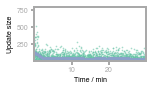

In [22]:
agent4.runRat(trainTime=30,saveEvery=0.5)

## 4.2.1 ...and save to file? 

In [23]:
agent4.saveToFile(name="multiscale")

## 4.3 Plot all figures 

'/Users/tomgeorge/Documents/figureMaking/figures/211104/svg/pc_large_0854_1'

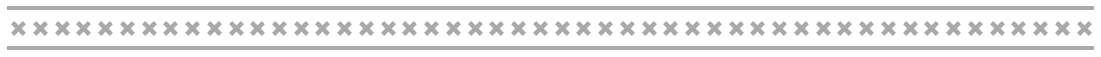

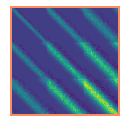

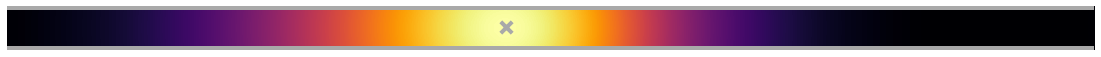

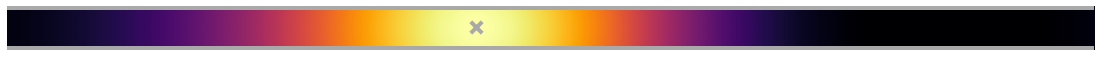

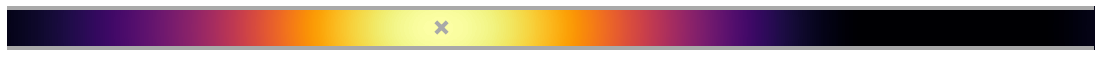

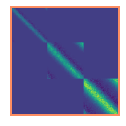

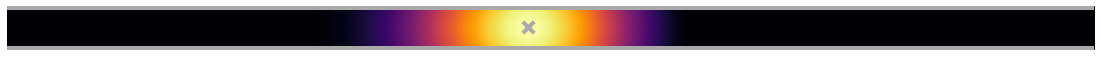

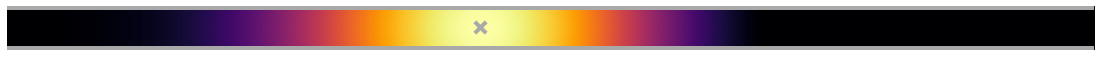

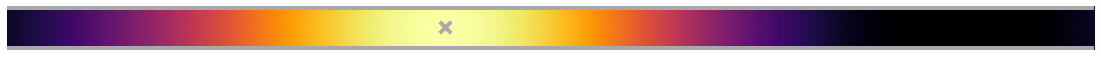

In [24]:
plotter4 = Visualiser(agent4)

#FIGURE 4A 
fig, ax = plotter4.plotFeatureCells(centresOnly=True, textlabel=False,threetypes=False)
saveFigure(fig,'openloop_threetypes',specialLocation="../figures/paperFigures/figure4/4C.svg")

W_onDiag = agent4.W.copy()
for i in range(agent4.nCells):
    for j in range(agent4.nCells):
        if i < 50: 
            if j >= 50: 
                W_onDiag[i,j] = 0 
        elif 50 <= i < 100:
            if j < 50 or j >= 100: 
                W_onDiag[i,j] = 0 
        elif i >= 100: 
            if j < 100: 
                W_onDiag[i,j] = 0

agent4.W_onDiag = W_onDiag
plotter4 = Visualiser(agent4)



#Figure 4D
fig, ax = plotter4.plotM(M=agent4.W,colorbar=False,colormatchto='W_onDiag')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure4/4D.svg')

fig, ax = plotter4.plotPlaceField(number=25, M=agent4.W,threshold=0)
saveFigure(fig,'pc_small',specialLocation="../figures/paperFigures/figure4/4Di.svg")

fig, ax = plotter4.plotPlaceField(number=75, M=agent4.W,threshold=0)
saveFigure(fig,'pc_medium',specialLocation="../figures/paperFigures/figure4/4Dii.svg")

fig, ax = plotter4.plotPlaceField(number=125, M=agent4.W,threshold=0)
saveFigure(fig,'pc_large',specialLocation="../figures/paperFigures/figure4/4Diii.svg")



#Figure 4E
fig, ax, = plotter4.plotM(M=agent4.W_onDiag,colorbar=False,colormatchto='W_onDiag')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_onDiag',specialLocation='../figures/paperFigures/figure4/4E.svg')

fig, ax = plotter4.plotPlaceField(number=25, M=agent4.W_onDiag,threshold=0)
saveFigure(fig,'pc_small',specialLocation="../figures/paperFigures/figure4/4Ei.svg")

fig, ax = plotter4.plotPlaceField(number=75, M=agent4.W_onDiag,threshold=0)
saveFigure(fig,'pc_medium',specialLocation="../figures/paperFigures/figure4/4Eii.svg")

fig, ax = plotter4.plotPlaceField(number=125, M=agent4.W_onDiag,threshold=0)
saveFigure(fig,'pc_large',specialLocation="../figures/paperFigures/figure4/4Eiii.svg")


In [ ]:
#FIGURE 4C
N=50
loopsize=5
xcen = np.linspace(0,loopsize,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

sigmas = [0.25,0.5,0.75,1,1.25,1.5,1.75,2]
w_bank = np.zeros(shape=(len(sigmas),N,N))

for (i, sigma) in enumerate(sigmas):
    parameters = {
            #Maze params 
            'mazeType'            : 'loop',  #type of maze, define in getMaze() function
            'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
            'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
            'roomSize'            : loopsize,          #maze size scaling parameter, metres
            'dt'                  : 0.005,       #simulation time disretisation 
            'centres'             : centres,       #array of receptive field positions. Overwrites nCells
            'sigma'               : sigma,          #basis cell width scale (irrelevant for onehots)
            'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
            #TD params 
            'tau'                 : 3,          #TD decay time, seconds
            'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
            'alpha'               : 0.01,       #TD learning rate 
            'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
            #STDP params
            'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
            'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
            'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
            'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
            'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
            'eta_post'            : 0.05,        #learning rate for post to pre weakening
            'kappa'               : 1,        #von mises spread parameter (smaller = wider)
            'tau_pre'             : 20e-3,      #rate potentiating trace decays
            'tau_post'            : 20e-3,      #rate depressing trace decays 
            'baselineFiringRate'  : 0
    }

    agentsigma =  MazeAgent(parameters)
    agentsigma.runRat(trainTime=10,TDSRLearn=False)
    w_bank[i] = agentsigma.W

taus = np.zeros(len(sigmas))
taus_sigma = np.zeros(len(sigmas))

for (i,sigma) in enumerate(sigmas):
    t = []
    w_shifted = np.zeros_like(agentsigma.W)
    w = w_bank[i]
    for j in range(agentsigma.nCells):
        w_shifted[j,:] = np.roll(w[j,:],-j)
    w_shifted_mean = np.mean(w_shifted,axis=0)
    b = np.argmax(w_shifted_mean)
    plt.plot(w_shifted_mean)
    max_binding = w_shifted_mean[b]
    while True: 
        if w_shifted_mean[b] <= max_binding / np.e:
            t = agentsigma.nCells - b
            break
        else: 
            b -= 1 
    tau =  t * (agentsigma.roomSize / agentsigma.nCells) / (agentsigma.speedScale)
    taus[i] = tau

taus_plot = taus
taus_sigma_plot = taus_sigma
sigmas_plot = sigmas



fig, ax = plt.subplots(figsize=(2,2))
[m,c] = np.polyfit(sigmas_plot,taus_plot,deg=1)
x = np.linspace(0,sigmas_plot[-1],100)
y = m*x + c
color = ['darkgrey'] * len(sigmas)
color[1],color[3],color[5] = 'C2','#B696C7','C3'
size = [25] * len(sigmas)
ax.scatter(sigmas_plot,taus_plot,s=size,c=color)
# ax.errorbar(sigmas_plot,taus_plot,taus_sigma_plot,ls="none",c=color)
ax.plot(x,y,c='darkgrey',linestyle='--',linewidth=1)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0,right=sigmas_plot[-1]+0.1)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('darkgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('none')        
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('none')
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels(['','','','',''])
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['','','','',''])
ax.tick_params(width=2,color='darkgrey')

saveFigure(fig,"tausigma",specialLocation="../figures/paperFigures/figure4/4A.svg")